In [1]:
from pandas import read_csv 
import numpy as np

In [2]:
df = read_csv('international-airline-passengers.csv', usecols=[1])
df.describe()

,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [3]:
values = df.values.astype('float32')
values.shape

(144, 1)

In [4]:
train_size = int((values.shape[0] * 0.67))
test_size = values.shape[0]  - train_size
train = values[0:train_size]
test = values[train_size:]

In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range =(0,1))
train = scaler.fit_transform(train)
test = scaler.transform(test)

In [6]:
def create_dataset(data, k):
    dataX, dataY = [],[]
    for i in range(data.shape[0] - k):
        x = data[i:i + k, 0]
        y = data[i + k, 0]
        dataX.append(x)
        dataY.append(y)
    return np.array(dataX), np.array(dataY)

In [7]:
look_back = 12
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
print(trainX.shape , trainY.shape)

(84, 12) (84,)


In [8]:
trainX = np.reshape(trainX , (trainX.shape[0] , trainX.shape[1] , 1))
testX = np.reshape(testX , (testX.shape[0] , testX.shape[1] , 1))

In [9]:
from keras.models import Sequential
from keras.layers import SimpleRNN , Dense

In [10]:
model = Sequential()
model.add(SimpleRNN(4,input_shape=(look_back , 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error' , optimizer = 'adam')
model.fit(trainX , trainY , epochs=10 , batch_size = 1)

Epoch 1/10


C:\Users\Naman Gupta\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.2703
Epoch 2/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0437
Epoch 3/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0264
Epoch 4/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0327
Epoch 5/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0244
Epoch 6/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0205
Epoch 7/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0148
Epoch 8/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0148
Epoch 9/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0146  
Epoch 10/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0141


In [14]:
testPredict = model.predict(testX)
testPredict = scaler.inverse_transform(testPredict).ravel()

trainPredict = model.predict(trainX)
trainPredict = scaler.inverse_transform(trainPredict).ravel()

testTrue = scaler.inverse_transform([testY]).ravel()
trainTrue = scaler.inverse_transform([trainY]).ravel()


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


In [15]:
testPredict.shape , testTrue.shape

((36,), (36,))

In [16]:
from matplotlib import pyplot as plt

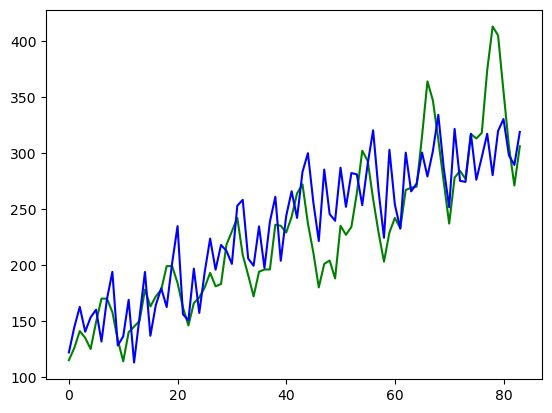

In [18]:
plt.plot(trainTrue , c='g')
plt.plot(trainPredict , c='b')
plt.show()

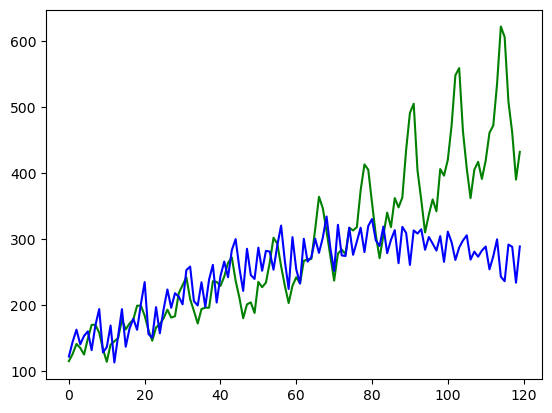

In [21]:
combinedPredict = np.concatenate((trainPredict , testPredict))
combinedTrue = np.concatenate((trainTrue , testTrue))

plt.plot(combinedTrue , c='g')
plt.plot(combinedPredict , c='b')
plt.show()